In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
data = pd.read_csv('ratings.csv')

# Display the first few rows of the dataset
data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
# Split the dataset into features (X) and target (y)
X = data[['userId', 'movieId']]
y = data['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [6]:
# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1.098036313363161
R-squared: 0.0018222242743777262


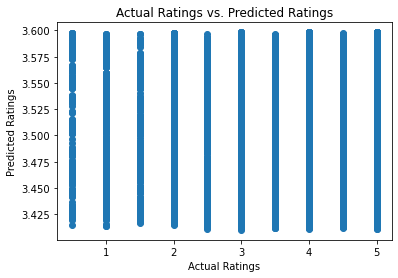

In [7]:
# Plot the actual ratings vs. predicted ratings
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual Ratings vs. Predicted Ratings")
plt.show()


In [10]:
from scipy.stats import ttest_rel


In [11]:
# Calculate the differences between actual and predicted ratings
differences = y_test - y_pred


In [12]:
# Perform the t-test
t_stat, p_value = ttest_rel(y_test, y_pred)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -0.7708323920790653
P-value: 0.4408153151028438


In [13]:
# Check if the p-value is less than the significance level (e.g., 0.05)
significance_level = 0.05

if p_value < significance_level:
    print("The p-value is less than the significance level. Reject the null hypothesis.")
    print("There is a significant difference between the actual and predicted ratings.")
else:
    print("The p-value is greater than the significance level. Fail to reject the null hypothesis.")
    print("There is no significant difference between the actual and predicted ratings.")


The p-value is greater than the significance level. Fail to reject the null hypothesis.
There is no significant difference between the actual and predicted ratings.


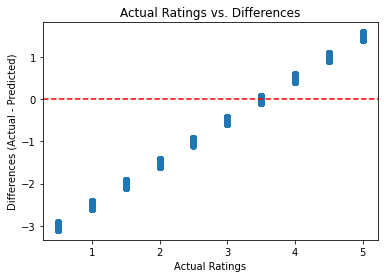

In [14]:
# Create a scatter plot of the differences
plt.scatter(y_test, differences)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Ratings")
plt.ylabel("Differences (Actual - Predicted)")
plt.title("Actual Ratings vs. Differences")
plt.show()


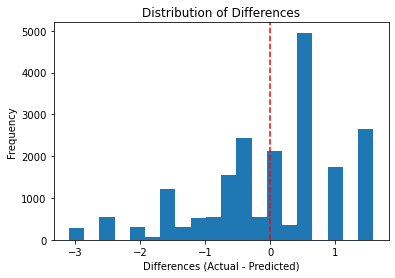

In [15]:
# Create a histogram of the differences
plt.hist(differences, bins=20)
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel("Differences (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Differences")
plt.show()


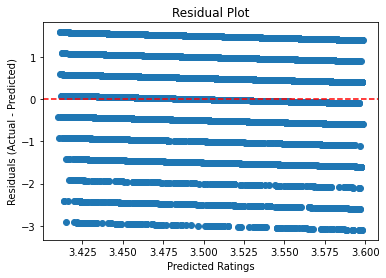

In [16]:
# Calculate the residuals
residuals = y_test - y_pred

# Create a residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Ratings")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()


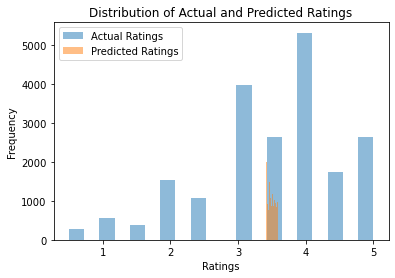

In [17]:
# Create histograms for actual and predicted ratings
plt.hist(y_test, bins=20, alpha=0.5, label='Actual Ratings')
plt.hist(y_pred, bins=20, alpha=0.5, label='Predicted Ratings')
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Distribution of Actual and Predicted Ratings")
plt.legend()
plt.show()


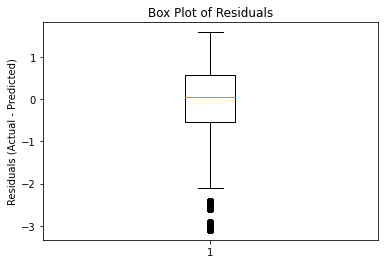

In [18]:
# Create a box plot of the residuals
plt.boxplot(residuals)
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Box Plot of Residuals")
plt.show()
